### Contents

01 Import libraries and dataset  
02 Key Question 3  
03 Key Question 4  
04 Key Question 5  
05 Key Question 6  
06 Further Customer Profiling  
07 Key Question 8  
08 Key Question 9  
09 Key Question 10  
10 Export Dataframe

### 01 Import libraries and dataset

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Create path
path = r"C:\Users\cathe\OneDrive\Data Analysis\2 4 Instacart Basket Analysis"

In [5]:
#Import dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_noPII_no_low.pkl'))

In [7]:
#Check dataframe
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,region,low_activity,profile,expenditure
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,NaN,375.7
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,NaN,375.7
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,NaN,375.7
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,NaN,375.7
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Alabama,31,2/17/2019,3,married,40423,South,NaN,NaN,375.7


In [13]:
#List columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30963910 entries, 0 to 32404160
Data columns (total 34 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       int64  
 1   user_id                        int64  
 2   order_number                   int64  
 3   order_day_of_week              int64  
 4   order_hour_of_day              int64  
 5   days_since_prior_order         float64
 6   product_id                     int64  
 7   add_to_cart_order              int64  
 8   reordered                      int64  
 9   product_name                   object 
 10  aisle_id                       int64  
 11  department_id                  int64  
 12  prices                         float64
 13  price_range_loc                object 
 14  busiest_day                    object 
 15  busiest_days                   object 
 16  busiest_period_of_day          object 
 17  max_order                      int64  
 18  loyal

### 02 Key Question 3

Key Question 3 is: Can we develop simpler price range groupings to help direct efforts of marketing and sales departments?

The column price_range_loc was created earlier to address this question.  Now we need to create a visualisation for the groupings to show how many products we have in each group.

In [129]:
#Count of number of products in each price-range group
pie_data = df.groupby('price_range_loc').agg({'product_id': 'nunique'})

In [131]:
pie_data

,product_id
price_range_loc,
High-range product,545
Low-range product,16280
Mid-range product,32803


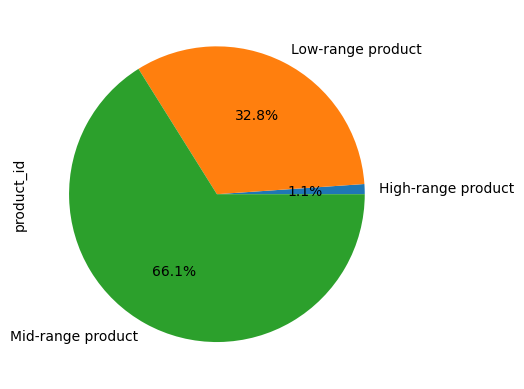

In [135]:
#Pie chart showing proportion of products which are low, mid or high range
pie = pie_data.plot.pie(y='product_id', autopct='%1.1f%%', legend=False)

In [137]:
#Export pie chart to visualisations folder
pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_price_range.png'))

### 03 Key Question 4

Key Question 4 is: Which departments have the highest frequency of product orders?

In [19]:
#Frequency of department_id (= how many products ordered)
df['department_id'].value_counts()

department_id
4     9079273
16    5176528
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

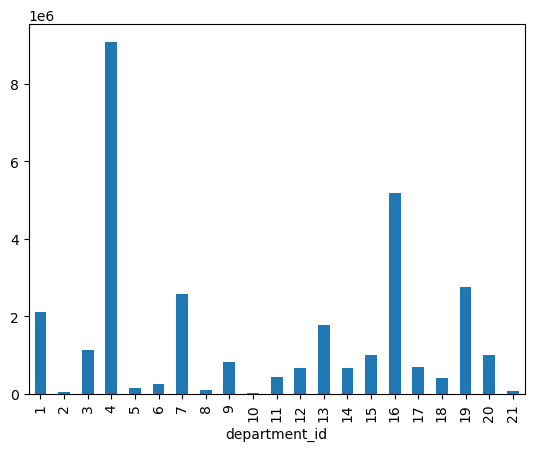

In [23]:
#Bar chart of number of product orders per department
bar = df['department_id'].value_counts().sort_index().plot.bar()

In [25]:
#Export bar chart to visualisations folder
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_departments_orderfreq.png'))

### 04 Key Question 5

Key Question 5 is: What's the distribution of users in regards to their brand loyalty? (ie how often do they return to Instacart?)

In [49]:
#Number of customers with each loyalty flag
df.groupby('loyalty_flag').agg({'user_id': ['nunique']})

,user_id
,nunique
loyalty_flag,
Loyal customer,17017
New customer,68750
Regular customer,76864


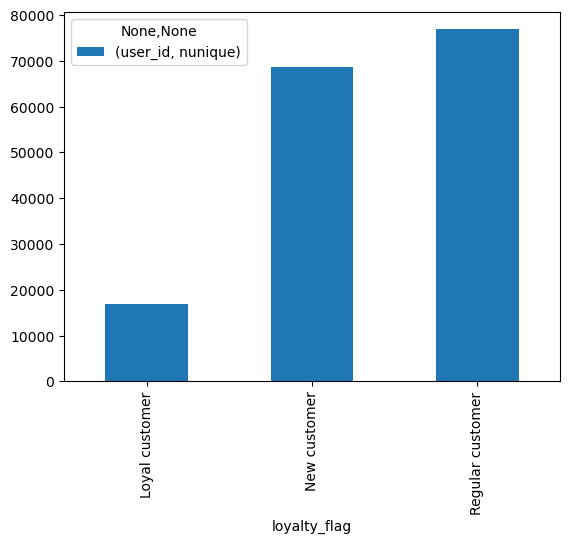

In [51]:
#Create bar chart of number of customers with each loyalty flag
bar2 = df.groupby('loyalty_flag').agg({'user_id': ['nunique']}).plot.bar()

In [53]:
#Export bar chart to visualisations folder
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_loyalty_numbers.png'))

### 05 Key Question 6

Key Question 6 is: Are there differences in ordering habits based on a customer’s loyalty status?

In [63]:
#Create table comparing spend_level and Loyalty_flag
crosstab = pd.crosstab(df['loyalty_flag'], df['spend_level'], dropna = False)

In [67]:
# Add percentage of customers who are High spenders column

crosstab['% high spender'] = crosstab['High spender']/(crosstab['High spender']+crosstab['Low spender'])

In [69]:
crosstab

spend_level,High spender,Low spender,% high spender
loyalty_flag,,,
Loyal customer,13896,10270114,0.001351
New customer,36446,4767091,0.007587
Regular customer,47271,15829092,0.002977


### 06 Further Customer Profiling

So far, we have:

Young parent:
- age 40 or younger
- number of dependents at least 1
- department used: babies (department_id 18)

Further categories to set up now:

Young childfree:
- age 40 or younger
- no dependents

Older Parent/Carer:
- age more than 40, less than 65
- number of dependents at least 1

Older carefree:
- age more than 40, less than 65
- no dependents

Retired:
- age 65 or over

In [9]:
#Young childfree:
df.loc[(df['age'] <= 40) & (df['n_dependants'] < 1), 'profile'] = 'Young childfree'

In [11]:
#Older Parent/Carer:
df.loc[(df['age'] > 40) & (df['age'] < 65) & (df['n_dependants'] >= 1), 'profile'] = 'Older Parent/Carer'

In [13]:
#Older carefree:
df.loc[(df['age'] > 40) & (df['age'] < 65) & (df['n_dependants'] < 1), 'profile'] = 'Older carefree'

In [15]:
#Retired:
df.loc[df['age'] >= 65, 'profile'] = 'Retired'

In [85]:
#Check profile column
df['profile'].value_counts(dropna = False)

profile
Older Parent/Carer    8682963
Retired               8195386
NaN                   5722963
Older carefree        2937383
Young childfree       2780191
Young parent          2645024
Name: count, dtype: int64

In [91]:
#Look at reason for empty profile values
df.loc[pd.isnull(df['profile'])].sample(30)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,region,low_activity,profile,expenditure
13046482,577415,82618,10,0,14,7.0,38563,3,1,Mint Chocolate Chip Ice Cream,...,West Virginia,39,12/17/2019,1,married,73953,South,NaN,NaN,1166.4
1060610,890893,6851,18,3,16,8.0,20574,9,1,Roasted Turkey,...,Kansas,35,3/3/2018,1,married,73064,Midwest,NaN,NaN,1983.1
15043067,610480,95305,2,5,18,19.0,33784,5,1,Ground Sumatra Deep Roast,...,Mississippi,26,12/5/2019,1,married,62780,South,NaN,NaN,1784.7
5793616,326678,36925,5,0,14,20.0,33122,3,1,Peanut Butter Dark Chocolate Protein Chewy Bars,...,Alabama,25,5/21/2017,2,married,43121,South,NaN,NaN,877.7
1937622,1588103,12473,92,4,8,4.0,18811,5,1,Organic Apple Juice,...,North Dakota,39,10/2/2017,1,married,83264,Midwest,NaN,NaN,2812.4
18257366,1817984,115673,3,5,3,30.0,39275,1,0,Organic Blueberries,...,California,21,1/15/2017,2,living with parents and siblings,42381,West,NaN,NaN,390.9
9359102,3210503,59500,21,2,9,10.0,36869,15,1,O'Soy Smooth & Creamy Vanilla Organic Soy Yogurt,...,Massachusetts,33,12/9/2017,3,married,40147,Northeast,NaN,NaN,4594.8
27974671,1551316,177956,11,3,14,14.0,45842,22,1,Natural Sour Cream,...,Kansas,32,6/4/2018,3,married,59034,Midwest,NaN,NaN,5483.6
3770980,3385375,23971,18,1,15,1.0,9387,1,0,Granny Smith Apples,...,Alabama,30,1/15/2018,1,married,29336,South,NaN,NaN,587.9
21428393,278682,136217,29,1,10,4.0,38944,9,1,Seven Grain Crispy Tenders,...,Virginia,29,10/15/2018,2,married,100475,South,NaN,NaN,3212.4


It is the under 40s with dependents who haven't shopped in the baby section

In [17]:
#Young parent/carer:
df.loc[(pd.isnull(df['profile'])) & (df['age'] <= 40), 'profile'] = 'Young parent/carer'

In [19]:
#Check again
df['profile'].value_counts(dropna = False)

profile
Older Parent/Carer    8682963
Retired               8195386
Young parent/carer    5722963
Older carefree        2937383
Young childfree       2780191
Young parent          2645024
Name: count, dtype: int64

Summary:  "Young" in profile name implies age 18-40, "Older" is age 41-64 and "Retired" is 65+.  The other part says if they have dependents or not.  In addition, "Young parent" have used the baby department.

### 07 Key Question 8

Key Question 8 is: Is there a connection between age and family status in terms of ordering habits?

Now that we have profiles splitting into age and family status groupings, we can use the profiles to answer the question.

In [101]:
#Create table comparing spend_level and profile
crosstab2 = pd.crosstab(df['profile'], df['spend_level'], dropna = False)

In [109]:
# Add percentage of profiles who are High spenders column

crosstab2['% high spender'] = crosstab2['High spender']/(crosstab2['High spender']+crosstab2['Low spender'])

In [111]:
crosstab2

spend_level,High spender,Low spender,% high spender
profile,,,
Older Parent/Carer,26790,8656173,0.003085
Older carefree,11602,2925781,0.003950
Retired,26965,8168421,0.003290
Young childfree,8451,2771740,0.003040
Young parent,1106,2643918,0.000418
Young parent/carer,22699,5700264,0.003966


### 08 Key Question 9

Key Question 9 is: What different classifications does the demographic information suggest?  Age?  Income?  Certain types of goods?  Family status?

This is about profiling, so to answer this question I will work out the number of customers in each profile group.

In [139]:
#Count of number of customers in each profile group
df.groupby('profile').agg({'user_id': 'nunique'})

,user_id
profile,
Older Parent/Carer,45897
Older carefree,15296
Retired,43250
Young childfree,14728
Young parent,8028
Young parent/carer,35432


In [155]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

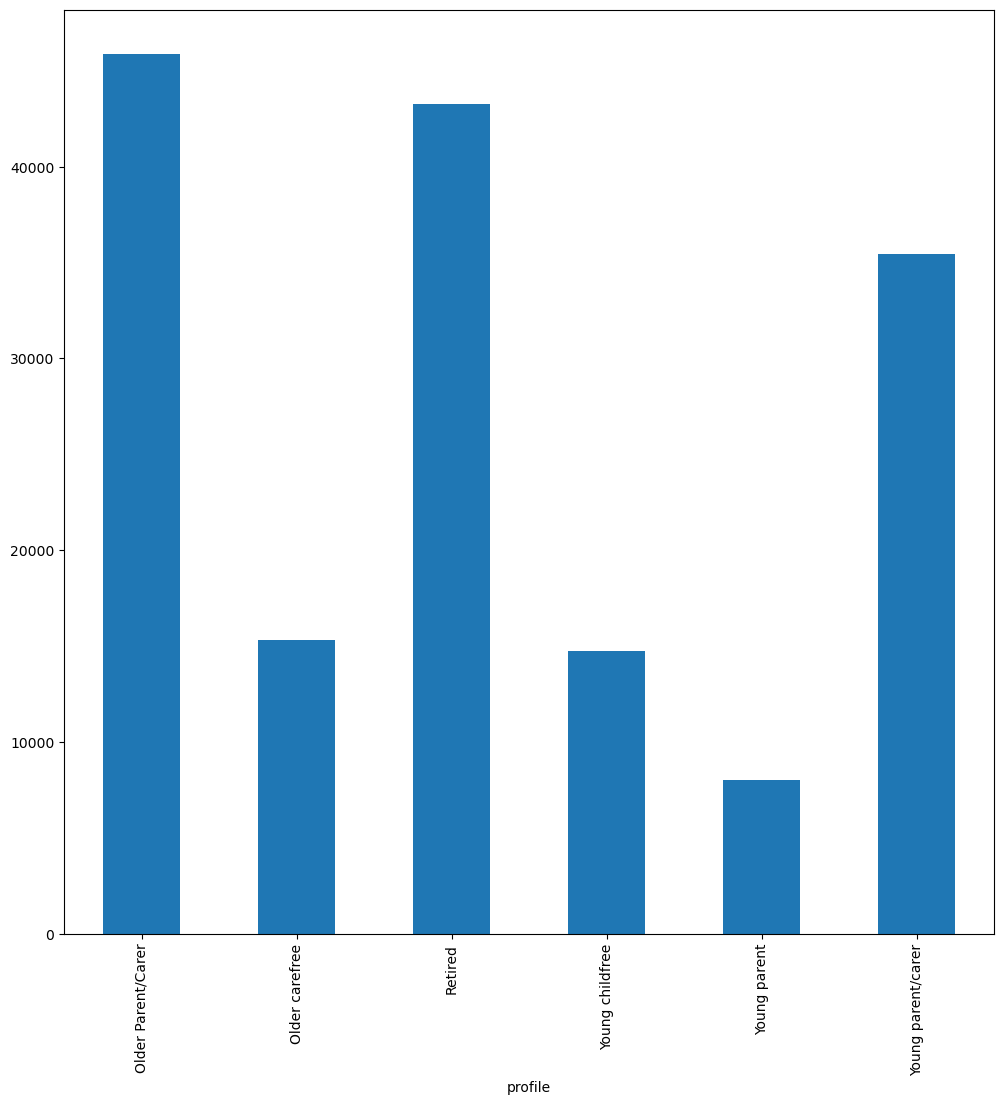

In [165]:
#Create bar chart to show this information
bar_p = df.groupby('profile').agg({'user_id': 'nunique'}).plot.bar(figsize=(12,12), legend=False)

In [167]:
#Export visualisation
bar_p.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_profiles.png'))

### 09 Key Question 10

Key Question 10 is: What differences can you find in ordering habits of different customer profiles?

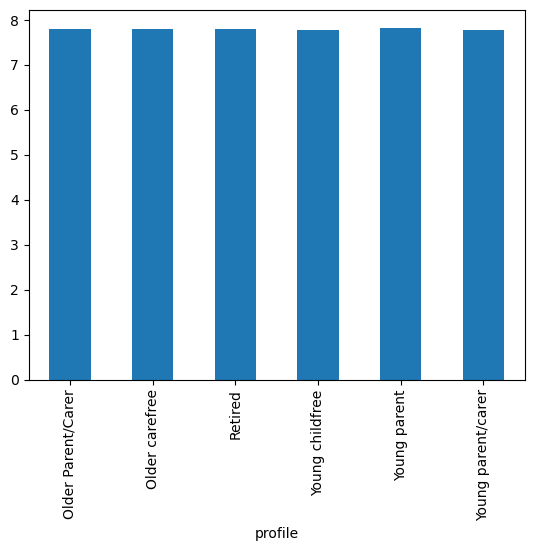

In [183]:
#Create bar chart to show average spend per item
bar_a = df.groupby('profile').agg({'av_item_spend': 'mean'}).plot.bar(legend=False)

No significant difference

In [196]:
#Export bar chart
bar_a.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_av_spend_profile.png'))

In [27]:
#Create new column total_order_amount
df['total_order_amount'] = df.groupby(['order_id'])['prices'].transform(np.sum)

C:\Users\cathe\AppData\Local\Temp\ipykernel_13956\2095758320.py:2: FutureWarning: The provided callable <function sum at 0x00000205D58F7C40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['total_order_amount'] = df.groupby(['order_id'])['prices'].transform(np.sum)


In [206]:
#Check output
df.sample(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,n_dependants,fam_status,income,region,low_activity,profile,expenditure,total_order_amount
6310405,1351231,40227,1,3,14,NaN,38012,4,0,Organic Cream of Mushroom Condensed Soup,...,24,8/18/2018,0,single,66346,Northeast,NaN,Young childfree,612.4,40.9
5377905,286653,34202,7,1,20,7.0,47626,6,1,Large Lemon,...,51,7/10/2018,0,single,111576,West,NaN,Older carefree,2229.7,137.9
26205662,2073080,166686,50,5,16,5.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,29,2/14/2018,0,single,245083,South,NaN,Young childfree,3821.5,71.9
29279371,421551,186143,4,1,20,16.0,3579,1,0,Home Style Beefless Tips,...,20,12/17/2017,3,living with parents and siblings,79356,South,NaN,Young parent,2244.0,61.1
18090429,2219023,114570,27,6,14,13.0,14947,14,1,Pure Sparkling Water,...,69,8/8/2018,0,divorced/widowed,103929,Northeast,NaN,Retired,6192.1,170.2


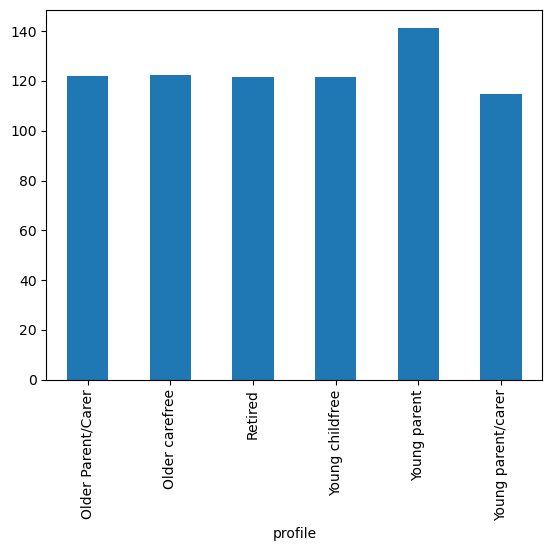

In [33]:
#Create bar chart to show average order amount
bar_o = df.groupby('profile').agg({'total_order_amount': 'mean'}).plot.bar(legend=False)

Young parents spend more per order than the other groups, and other young people with dependents spend slightly less.

In [36]:
#Export visualisation
bar_o.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_profile_totalspend.png'))

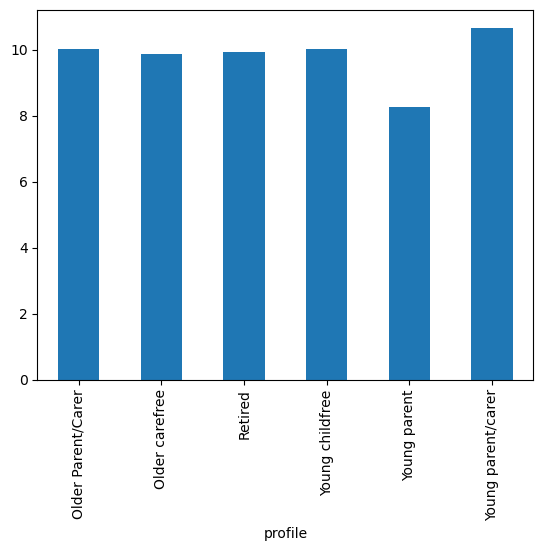

In [186]:
#Create bar chart to show average time between orders
bar_t = df.groupby('profile').agg({'median_days_since_prior_order': 'mean'}).plot.bar(legend=False)

Young parents order more frequently than the other groups, and other young people with dependents very slightly less frequently, on average.

In [199]:
#Export bar chart
bar_t.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_av_orderfrequency_profile.png'))

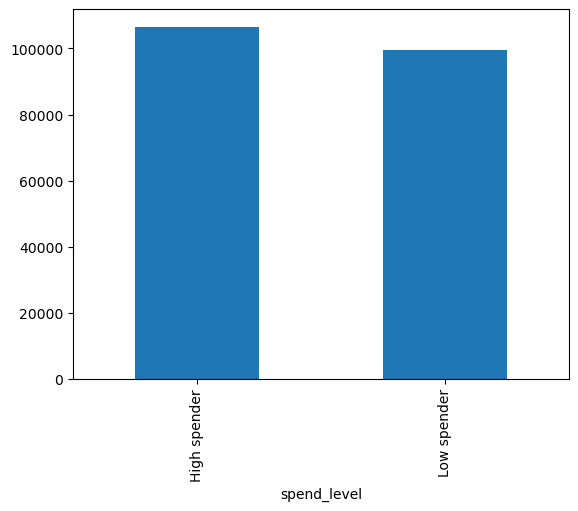

In [189]:
#Create bar chart to show average income for high and low spenders
bar_s = df.groupby('spend_level').agg({'income': 'mean'}).plot.bar(legend=False)

High spenders earn more on average

In [202]:
#Export bar chart
bar_s.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_spendlevel_avincome.png'))

In [193]:
#Create table to show average, min, max income for high and low spenders
df.groupby('spend_level').agg({'income': ['mean', 'min', 'max']})

income               
                       mean    min     max
spend_level                               
High spender  106505.741797  41746  430161
Low spender    99651.752455  25903  593901

Min income of low spenders is significantly lower than min income of high spenders, as with the mean, but the highest income belongs to a low spender.

### 10 Export dataframe

In [39]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all_final.pkl'))